In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [23]:
print("numpy",np.__version__)
print("pandas", pd.__version__)

numpy 2.0.2
pandas 2.2.2


In [24]:
df = pd.read_csv('spam.csv', encoding = 'latin1')

In [25]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [26]:
# dropping last 3 columns
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)

In [27]:
# assigning column names
df.columns = ['labels', 'message']

In [28]:
# mapping names of ham and spam to integer
df['labels'] = df['labels'].map({'ham':0, 'spam':1})

In [29]:
# checking for null values
df.isnull().sum()

,0
labels,0
message,0


In [10]:
# checking for duplicate values
df.duplicated().sum()

np.int64(403)

In [30]:
# remove duplicates
df = df.drop_duplicates(keep = "first")

In [31]:
df.shape

(5169, 2)

In [32]:
df["labels"].value_counts()

,count
labels,
0,4516
1,653


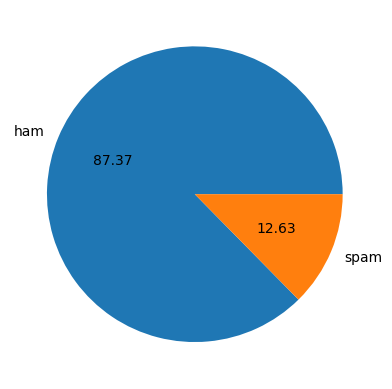

In [33]:
plt.pie(df["labels"].value_counts(), labels = ["ham", "spam"], autopct = "%0.2f")
plt.show()

it clarifies that:
1. data is unbalanced

In [34]:
import nltk
df['num_characters'] = df['message'].apply(len)

In [36]:
# for making column of word count
import string
def remove(text):
    return text.translate(str.maketrans('','',string.punctuation))   # made this type of function so that it will took much lesser time than the usual one
df['word_count'] =  df['message'].apply(remove).apply(lambda x: len(x.split()))

In [17]:
df[['num_characters', 'word_count']].describe()

,num_characters,word_count
count,5169.000000,5169.000000
mean,78.977945,15.128652
std,58.236293,10.848052
min,2.000000,0.000000
25%,36.000000,7.000000
50%,60.000000,12.000000
75%,117.000000,22.000000
max,910.000000,171.000000


In [18]:
df[df['labels']==0][['num_characters', 'word_count']].describe()

,num_characters,word_count
count,4516.000000,4516.000000
mean,70.459256,13.936005
std,56.358207,10.884112
min,2.000000,0.000000
25%,34.000000,7.000000
50%,52.000000,11.000000
75%,90.000000,18.000000
max,910.000000,171.000000


In [19]:
df[df['labels']==1][['num_characters', 'word_count']].describe()

,num_characters,word_count
count,653.000000,653.000000
mean,137.891271,23.376723
std,30.137753,5.869141
min,13.000000,2.000000
25%,132.000000,21.000000
50%,149.000000,25.000000
75%,157.000000,27.000000
max,224.000000,34.000000


from ham and spam description we got to know that spam messages are lengtheir and somwhat large than normal messages

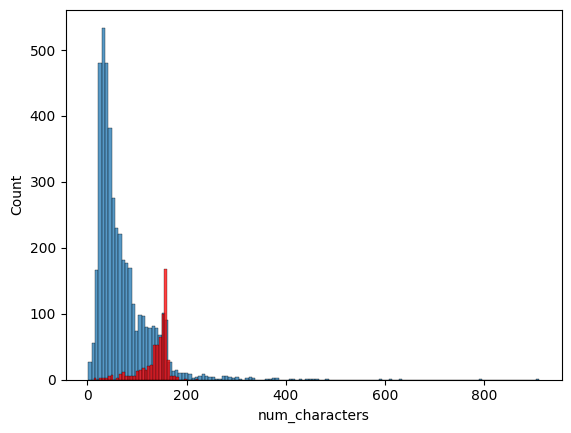

In [20]:
# comparing ham spam messages by histplot
sns.histplot(df[df['labels']==0]['num_characters'])
sns.histplot(df[df['labels']==1]['num_characters'], color = 'red')
plt.show()

In [37]:
df.corr()

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
def clean_data(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'\W', ' ' , text) # replaces every non-word character in text with a space ' '.
    text = re.sub(r'\s+', ' ', text) #replaces one or more whitespace characters (like spaces, tabs, or newlines) with a single space ' '.
    return text.strip()

In [ ]:
df['message']= df['message'].apply(clean_data)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# splitting data into test and training datasets
X_train, X_test, Y_train, Y_test = train_test_split(
    df['message'],
    df['labels'],
    test_size = 0.2,
    random_state = 42
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features = 2000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Training on naive bayes classifier
mnb = MultinomialNB(alpha = 0.35)
mnb.fit(X_train_vec, Y_train)

# predict the test
y_pred = mnb.predict(X_test_vec)

# evaluate the result
print("Classification Report: ", classification_report(Y_test, y_pred, target_names=["ham","spam"]))
print("Confusion Matrix: ", confusion_matrix(Y_test, y_pred))

In [ ]:
import pickle

In [ ]:
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))